<a href="https://colab.research.google.com/github/R4t0LoCo/R4t0LoCo/blob/main/TesteHEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np

In [149]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1bcvqcP_PiGtD1VVo0rwbdwx62AQqngDV', index_col=0, parse_dates=True)

In [150]:
# drop rows where Open, High, Low, and Close have the same value
df = df.drop(df[(df['Open'] == df['High']) & (df['High'] == df['Low']) & (df['Low'] == df['Close'])].index)

In [151]:
# Create a new column for binary values of Low to previous line low's
df['Low to Previous Low'] = (df['Low'] < df['Low'].shift(1)).astype(int)

In [152]:
# Create a new column for binary values of High to previous line high's
df['High to Previous High'] = (df['High'] > df['High'].shift(1)).astype(int)

In [153]:
# Create a new column for binary values of Close to Open
df['Close to Open'] = (df['Close'] > df['Open']).astype(int)

In [154]:
# Create three lags for 'Low to Previous Low'
df['Low to Previous Low Lag 1'] = df['Low to Previous Low'].shift(1)
df['Low to Previous Low Lag 2'] = df['Low to Previous Low'].shift(2)
df['Low to Previous Low Lag 3'] = df['Low to Previous Low'].shift(3)

In [155]:
# Create three lags for 'High to Previous High'
df['High to Previous High Lag 1'] = df['High to Previous High'].shift(1)
df['High to Previous High Lag 2'] = df['High to Previous High'].shift(2)
df['High to Previous High Lag 3'] = df['High to Previous High'].shift(3)

In [156]:
# Create three lags for 'Close to Open'
df['Close to Open Lag 1'] = df['Close to Open'].shift(1)
df['Close to Open Lag 2'] = df['Close to Open'].shift(2)
df['Close to Open Lag 3'] = df['Close to Open'].shift(3)

In [157]:
# Drop the first 20 rows of the DataFrame
df = df.drop(index=df.index[:20])

In [158]:
print(df)

                       Open    High     Low   Close  Volume  \
Gmt time                                                      
2019-02-01 06:00:00  53.026  53.116  52.935  53.075  0.0483   
2019-02-01 06:15:00  53.096  53.136  53.020  53.131  0.0228   
2019-02-01 06:30:00  53.115  53.211  53.015  53.110  0.0371   
2019-02-01 06:45:00  53.115  53.141  53.011  53.096  0.0309   
2019-02-01 07:00:00  53.091  53.186  53.055  53.131  0.0246   
...                     ...     ...     ...     ...     ...   
2021-12-31 18:45:00  77.912  77.917  77.772  77.852  0.0353   
2021-12-31 19:00:00  77.837  77.942  77.581  77.732  0.0502   
2021-12-31 19:15:00  77.727  77.872  77.532  77.792  0.0687   
2021-12-31 19:30:00  77.787  77.882  77.747  77.822  0.0250   
2021-12-31 19:45:00  77.827  77.882  77.742  77.842  0.0100   

                     Low to Previous Low  High to Previous High  \
Gmt time                                                          
2019-02-01 06:00:00                    0      

In [159]:
# Define the code dictionary
code_dict = {
    (0, 0, 0, 0): 'A',
    (1, 0, 0, 0): 'B',
    (0, 1, 0, 0): 'C',
    (1, 1, 0, 0): 'D',
    (0, 0, 1, 0): 'E',
    (1, 0, 1, 0): 'F',
    (0, 1, 1, 0): 'G',
    (1, 1, 1, 0): 'H',
    (0, 0, 0, 1): 'I',
    (1, 0, 0, 1): 'J',
    (0, 1, 0, 1): 'K',
    (1, 1, 0, 1): 'L',
    (0, 0, 1, 1): 'M',
    (1, 0, 1, 1): 'N',
    (0, 1, 1, 1): 'O',
    (1, 1, 1, 1): 'P'
}

# Define the function to encode columns
def encode_column(df, column_name):
    codes = df.apply(tuple, axis=1).map(code_dict)
    return pd.DataFrame({f'{column_name} Code': codes})

# Encode Low columns
low_cols = ['Low to Previous Low Lag 3', 'Low to Previous Low Lag 2', 'Low to Previous Low Lag 1', 'Low to Previous Low']
low_df = df[low_cols]
low_codes_df = encode_column(low_df, 'Low')

# Encode High columns
high_cols = ['High to Previous High Lag 3', 'High to Previous High Lag 2', 'High to Previous High Lag 1', 'High to Previous High']
high_df = df[high_cols]
high_codes_df = encode_column(high_df, 'High')

# Encode Close to Open columns
close_cols = ['Close to Open Lag 3', 'Close to Open Lag 2', 'Close to Open Lag 1', 'Close to Open']
close_df = df[close_cols]
close_codes_df = encode_column(close_df, 'Close')

# Concatenate the new columns to the original DataFrame
df = pd.concat([df, low_codes_df, high_codes_df, close_codes_df], axis=1)

In [160]:
print(df)

                       Open    High     Low   Close  Volume  \
Gmt time                                                      
2019-02-01 06:00:00  53.026  53.116  52.935  53.075  0.0483   
2019-02-01 06:15:00  53.096  53.136  53.020  53.131  0.0228   
2019-02-01 06:30:00  53.115  53.211  53.015  53.110  0.0371   
2019-02-01 06:45:00  53.115  53.141  53.011  53.096  0.0309   
2019-02-01 07:00:00  53.091  53.186  53.055  53.131  0.0246   
...                     ...     ...     ...     ...     ...   
2021-12-31 18:45:00  77.912  77.917  77.772  77.852  0.0353   
2021-12-31 19:00:00  77.837  77.942  77.581  77.732  0.0502   
2021-12-31 19:15:00  77.727  77.872  77.532  77.792  0.0687   
2021-12-31 19:30:00  77.787  77.882  77.747  77.822  0.0250   
2021-12-31 19:45:00  77.827  77.882  77.742  77.842  0.0100   

                     Low to Previous Low  High to Previous High  \
Gmt time                                                          
2019-02-01 06:00:00                    0      

In [161]:
# Create three lags for 'Low to Previous Low'
df['Low Code L1'] = df['Low Code'].shift(1)
df['Low Code L2'] = df['Low Code'].shift(2)
df['Low Code L3'] = df['Low Code'].shift(3)

In [162]:
# Create three lags for 'Low to Previous Low'
df['High Code L1'] = df['High Code'].shift(1)
df['High Code L2'] = df['High Code'].shift(2)
df['High Code L3'] = df['High Code'].shift(3)

In [163]:
# Create three lags for 'Low to Previous Low'
df['Close Code L1'] = df['Close Code'].shift(1)
df['Close Code L2'] = df['Close Code'].shift(2)
df['Close Code L3'] = df['Close Code'].shift(3)

In [164]:
# Drop the first 20 rows of the DataFrame
df = df.drop(index=df.index[:20])

In [165]:
print(df2)

                    Low Code Close Code High Code
Gmt time                                         
2019-02-01 06:00:00        G          I         B
2019-02-01 06:15:00        D          M         I
2019-02-01 06:30:00        J          G         M
2019-02-01 06:45:00        M          D         G
2019-02-01 07:00:00        G          J         L
...                      ...        ...       ...
2021-12-31 18:45:00        K          A         A
2021-12-31 19:00:00        N          A         I
2021-12-31 19:15:00        O          I         E
2021-12-31 19:30:00        H          M         K
2021-12-31 19:45:00        L          O         F

[64691 rows x 3 columns]


In [166]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Low to Previous Low',
       'High to Previous High', 'Close to Open', 'Low to Previous Low Lag 1',
       'Low to Previous Low Lag 2', 'Low to Previous Low Lag 3',
       'High to Previous High Lag 1', 'High to Previous High Lag 2',
       'High to Previous High Lag 3', 'Close to Open Lag 1',
       'Close to Open Lag 2', 'Close to Open Lag 3', 'Low Code', 'High Code',
       'Close Code', 'Low Code L1', 'Low Code L2', 'Low Code L3',
       'High Code L1', 'High Code L2', 'High Code L3', 'Close Code L1',
       'Close Code L2', 'Close Code L3'],
      dtype='object')


In [167]:
new_df = df[['Low Code L3', 'Low Code L2', 'Low Code L1', 'Low Code', 'High Code L3', 'High Code L2', 'High Code L1', 'High Code', 'Close Code L3', 'Close Code L2', 'Close Code L1', 'Close Code']]

In [168]:
new_df['Close Code Shifted'] = new_df['Close Code'].shift(1)

<ipython-input-168-94cd3fcb9a38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Close Code Shifted'] = new_df['Close Code'].shift(1)


In [169]:
new_df = new_df.rename(columns={'Close Code Shifted': 'target'})

In [170]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=f16f0edf3e2c80a0b506bddc11dbdb3e6cd18a91f9c44f476b62a16c18bd76a7
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [171]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp20qj_xiz
  JVM stdout: /tmp/tmp20qj_xiz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp20qj_xiz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,10 hours and 23 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_02eqe6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [172]:
h2o_df = h2o.H2OFrame(new_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [173]:
h2o_df['target'] = h2o_df['target'].asfactor()

In [174]:
train, valid = h2o_df.split_frame(ratios=[0.8], seed=1234)

In [175]:
aml = H2OAutoML(max_models=10, seed=1234, include_algos=["DRF", "GBM"])
aml.train(y="target", training_frame=train, validation_frame=valid)

AutoML progress: |
22:15:34.986: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230404_221534_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    129                2193                        2.36335e+06            0            7            6.29685       1             126           81.1578

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 1.7409999086225005e-05
RMSE: 0.004172529099506078
LogLoss: 6.904037688677303e-05
Mean Per-Class Error: 0.058823529411764705
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A     B     C     D     E     F     G     H     I     J     K     L     M     N     O     P     nan    Error        Rate
----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  -----  -----------  ----------
2942  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0      0            0 / 2,942
0     3282  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0      0            0 / 3,282
0     0     3418  0     0     0     0     0     0     0     0     0     0     0     0     0     0      0            0 / 3,418
0     0     0     3320  0     0     0     0     0     0     0     0     0     0     0     0     0      0            0 / 3,320
0     0     0     0     3443  0     0     0     0     0     0     0     0     0     0     0     0      0            0 / 3,443
0     0     0     0     0     3340  0     0     0     0     0     0     0     0     0     0     0      0            0 / 3,340
0     0     0     0     0     0     3357  0     0     0     0     0     0     0     0     0     0      0            0 / 3,357
0     0     0     0     0     0     0     3153  0     0     0     0     0     0     0     0     0      0            0 / 3,153
0     0     0     0     0     0     0     0     3231  0     0     0     0     0     0     0     0      0            0 / 3,231
0     0     0     0     0     0     0     0     0     3427  0     0     0     0     0     0     0      0            0 / 3,427
0     0     0     0     0     0     0     0     0     0     3394  0     0     0     0     0     0      0            0 / 3,394
0     0     0     0     0     0     0     0     0     0     0     3181  0     0     0     0     0      0            0 / 3,181
0     0     0     0     0     0     0     0     0     0     0     0     3222  0     0     0     0      0            0 / 3,222
0     0     0     0     0     0     0     0     0     0     0     0     0     3179  0     0     0      0            0 / 3,179
0     0     0     0     0     0     0     0     0     0     0     0     0     0     3138  0     0      0            0 / 3,138
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     2731  0      0            0 / 2,731
0     1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0      1            1 / 1
2942  3283  3418  3320  3443  3340  3357  3153  3231  3427  3394  3181  3222  3179  3138  2731  0      1.93203e-05  1 / 51,759

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.999981
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
10   1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 4.469019407873298e-07
RMSE: 0.0006685072481187693
LogLoss: 1.164186222

In [176]:
lb = aml.leaderboard
print(lb)

model_id                                       mean_per_class_error      logloss        rmse          mse
GBM_grid_1_AutoML_1_20230404_221534_model_2               0.0588235  0.00023124   0.00458655  2.10365e-05
GBM_5_AutoML_1_20230404_221534                            0.0588235  0.000229874  0.00478891  2.29336e-05
GBM_1_AutoML_1_20230404_221534                            0.0588235  0.000231731  0.00471594  2.22401e-05
GBM_grid_1_AutoML_1_20230404_221534_model_3               0.0588235  0.000226461  0.0045739   2.09206e-05
GBM_grid_1_AutoML_1_20230404_221534_model_1               0.0588235  0.000231398  0.0046508   2.16299e-05
GBM_4_AutoML_1_20230404_221534                            0.0588235  0.000226628  0.00469779  2.20693e-05
DRF_1_AutoML_1_20230404_221534                            0.0588235  0.00104558   0.00595315  3.544e-05
GBM_3_AutoML_1_20230404_221534                            0.0588235  0.00022675   0.00469824  2.20735e-05
GBM_2_AutoML_1_20230404_221534                  

Teste AutoML H2o

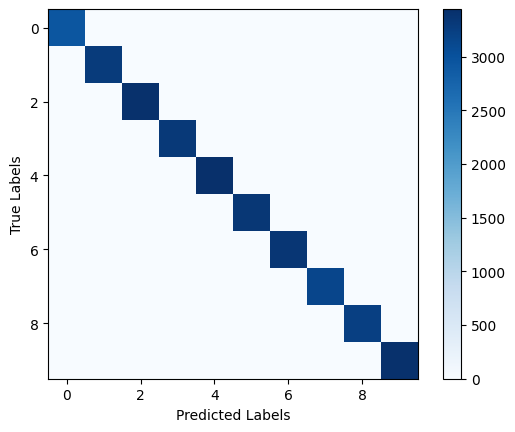

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the confusion matrix from the output
conf_matrix = np.array([[2942.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 3282.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 3418.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 3320.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 3443.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 3340.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3357.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3153.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3231.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3427.0]])

# Plot the confusion matrix using Matplotlib's imshow() function
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# Add axis labels and a colorbar
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Show the plot
plt.show()